# anni-seq train subset (531 instances)

In [32]:
import pickle
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter("ignore")


def read_e2e(prefix="anni_train"):
    allp = 531
    #allp = 5301
    
    # Read data
    datasets = {}
    for f in glob(f"./pickled-data/end_to_end/custom_{prefix}_*.csv"):
        name = f.split("/")[-1]
        datasets[name] = pd.read_csv(f, index_col="solver")
        
    # Retrieve all known solvers
    with open(f"./pickled-data/{prefix}_df.pkl", "rb") as runtime_file:
        runtimes_df = pickle.load(runtime_file)
    column_list = list(runtimes_df.columns)
    del runtimes_df
    
    solvers_to_use = list(range(len(column_list)))
    
    tups = []
    for n, df in datasets.items():
        tups.append((
            n[18:-4],
            np.mean(df.loc[solvers_to_use, "num_instances"]) / allp,
            np.mean(df.loc[solvers_to_use, "amount_runtime"]),
            np.mean(df.loc[solvers_to_use, "par2_ranking_acc"]),
            np.mean(df.loc[solvers_to_use, "label_ranking_acc"])
        ))
        
    res_df = pd.DataFrame.from_records(tups, columns=["name", "fraction_instances", "fraction_runtime", "par2", "label"])
    return res_df


def show_top_e2e(prefix="anni_train", par2_weight=0.85):
    res_df = read_e2e(prefix)
    res_df["score"] = par2_weight * res_df["par2"] + (1 - par2_weight) * (1 - res_df["fraction_runtime"])
    return res_df.sort_values(by=["score", "par2", "fraction_runtime"], ascending=False)
    

df_anni = read_e2e()
top_df_anni = show_top_e2e()

all_df = df_anni.set_index("name")

def get_best_for_weight(all_df, k=1.0):
    d = all_df.copy()
    d["score"] = k * all_df["par2"] + (1 - k) * (1 - all_df["fraction_runtime"])
    d["k"] = k
    return d.sort_values(by=["score", "par2", "fraction_runtime"], ascending=False).iloc[0, :]

ps = [
    get_best_for_weight(all_df, k=k)
    for k in np.arange(0.0, 1.001, 0.001)
]
r = pd.concat(ps, axis=1).transpose()
r.loc[::50, ["fraction_runtime", "fraction_instances", "par2", "score", "k"]]

,fraction_runtime,fraction_instances,par2,score,k
unc_0.00_True_rnk_conv_0.01_0.02_par2_obs,0.021064,0.024810,0.592885,0.978936,0.00
unc_0.00_True_rnk_conv_0.02_0.08_lbl_pred_True_0.00_10_0.01,0.023855,0.158274,0.764822,0.965579,0.05
unc_0.00_True_rnk_conv_0.02_0.10_lbl_pred_True_0.00_20_0.05,0.025224,0.128224,0.778656,0.955164,0.10
ig_0.00_True_rnk_conv_0.01_0.10_lbl_pred_True_0.00_10_0.05,0.028080,0.111848,0.802372,0.946488,0.15
ig_0.00_True_rnk_conv_0.01_0.10_lbl_pred_True_0.00_10_0.05,0.028080,0.111848,0.802372,0.938010,0.20
ig_0.00_True_rnk_conv_0.01_0.10_lbl_pred_True_0.00_10_0.05,0.028080,0.111848,0.802372,0.929533,0.25
ig_0.00_True_rnk_conv_0.01_0.10_lbl_pred_True_0.00_10_0.05,0.028080,0.111848,0.802372,0.921056,0.30
ig_0.00_True_rnk_conv_0.01_0.10_lbl_pred_True_0.00_10_0.05,0.028080,0.111848,0.802372,0.912578,0.35
ig_0.00_True_rnk_conv_0.01_0.10_lbl_pred_True_0.00_10_0.05,0.028080,0.111848,0.802372,0.904101,0.40
ig_0.00_True_rnk_conv_0.01_0.10_lbl_pred_True_0.00_10_0.05,0.028080,0.111848,0.802372,0.895623,0.45


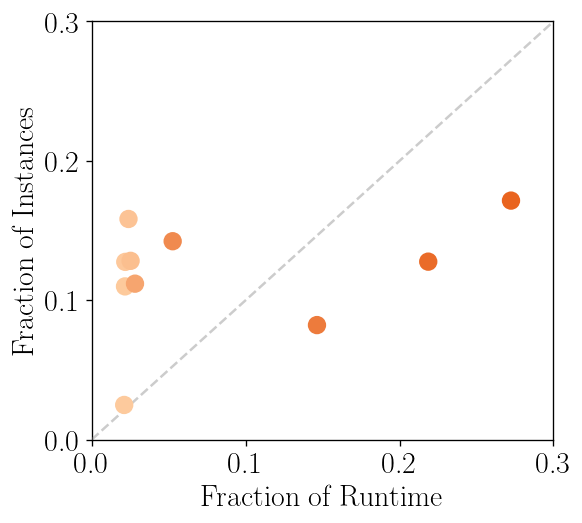

In [40]:
import seaborn as sns

s = {}
for i, row in r.iterrows():
    k = (row["fraction_instances"], row["fraction_runtime"])
    v = row["k"] if row["k"] > 0.004 else 0.0
    if k not in s:
        s[k] = [v]
    else:
        s[k].append(v)

sm = {}
for sk in s.keys():
    sm[sk] = np.mean(s[sk])
    
data = []
for (x, y), z in sm.items():
    data.append((x, y, z))
    
data = np.array(data)


fs = 18
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)

figure, axis = plt.subplots(1, 1, figsize=(5.5, 5), dpi=120)
figure.tight_layout(pad=4)

#plt.scatter(data[:, 1], data[:, 0], c=data[:, 2])
#sns.scatterplot(x=data[:, 1], y=data[:, 0], hue=data[:, 2])

#cmap = sns.color_palette("flare", as_cmap=True)
# 253, 202, 157
cmap = sns.blend_palette(['#fdca9d','#e6550d'], n_colors=6, as_cmap=True, input='hex')

points = axis.scatter(data[:, 1], data[:, 0], c=data[:, 2], s=100, cmap=cmap, zorder=10)
#cbar = figure.colorbar(points, ticks=[0.002,0.2,0.4,0.6,0.8,1.0])
#cbar.ax.set_yticklabels(["0.0","0.2","0.4","0.6","0.8","1.0"])
#cbar.ax.set_ylabel("$\delta$", fontsize=fs, rotation=0)

plt.plot(np.linspace(0.0, 1.0, 10), np.linspace(0.0, 1.0, 10), "--", color="grey", alpha=0.4, zorder=5)
axis.set_xlim(0.0, 0.3)
axis.set_ylim(0.0, 0.3)
axis.set_xlabel("Fraction of Runtime", fontsize=fs)
axis.set_ylabel("Fraction of Instances", fontsize=fs)
axis.set_xticks([0.0,0.1,0.2,0.3],[0.0,0.1,0.2,0.3])
axis.set_yticks([0.0,0.1,0.2,0.3],[0.0,0.1,0.2,0.3])

plt.savefig("plots/anni_train_optimization_goal.pgf")
plt.show()

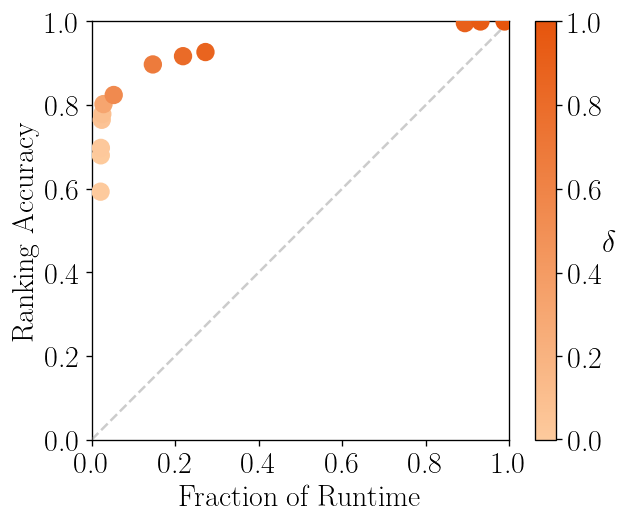

In [44]:
import seaborn as sns

s = {}
for i, row in r.iterrows():
    k = (row["fraction_runtime"], row["par2"])
    v = row["k"] if row["k"] > 0.004 else 0.0
    if k not in s:
        s[k] = [v]
    else:
        s[k].append(v)

sm = {}
for sk in s.keys():
    sm[sk] = np.mean(s[sk])
    
data = []
for (x, y), z in sm.items():
    data.append((x, y, z))
    
data = np.array(data)


fs = 18
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)

figure, axis = plt.subplots(1, 1, figsize=(6, 5), dpi=120)
figure.tight_layout(pad=4)

#plt.scatter(data[:, 1], data[:, 0], c=data[:, 2])
#sns.scatterplot(x=data[:, 1], y=data[:, 0], hue=data[:, 2])

#cmap = sns.color_palette("flare", as_cmap=True)
# 253, 202, 157
cmap = sns.blend_palette(['#fdca9d','#e6550d'], n_colors=6, as_cmap=True, input='hex')

points = axis.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=100, cmap=cmap, zorder=10)
cbar = figure.colorbar(points, ticks=[0.002,0.2,0.4,0.6,0.8,1.0])
cbar.ax.set_yticklabels(["0.0","0.2","0.4","0.6","0.8","1.0"])
cbar.ax.set_ylabel("$\delta$", fontsize=fs, rotation=0)

plt.plot(np.linspace(0.0, 1.0, 10), np.linspace(0.0, 1.0, 10), "--", color="grey", alpha=0.4, zorder=5)
axis.set_xlim(0.0, 1.0)
axis.set_ylim(0.0, 1.0)
axis.set_xlabel("Fraction of Runtime", fontsize=fs)
axis.set_ylabel("Ranking Accuracy", fontsize=fs)
rrr1 = [f"{x:.1f}" for x in np.arange(0.0,1.01,0.2)]
rrr2 = np.arange(0.0,1.01,0.2)
axis.set_xticks(rrr2,rrr1)
axis.set_yticks(rrr2,rrr1)

plt.savefig("plots/anni_train_delta_acc.pgf")
plt.show()

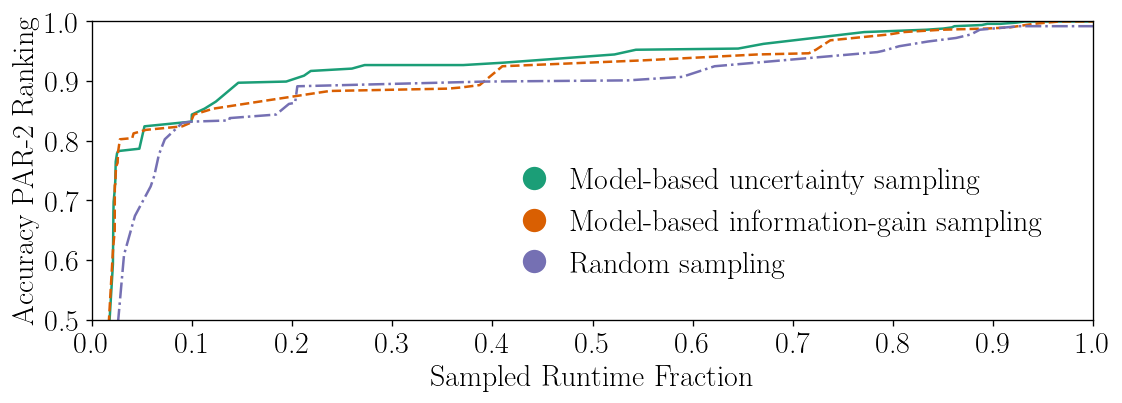

In [5]:
import pickle
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter("ignore")

fs = 18
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)

colorpalette = ['#1b9e77','#d95f02','#7570b3']
lines = ["-", "--", "-."]

def plot(axis, rel=True, color_selection=False, color_stopping=False, color_ranking=False, a=1.0):
    allp = 531  
    
    # Read data
    datasets = {}
    for f in glob("./pickled-data/end_to_end/custom_anni_train_*.csv"):
        name = f.split("/")[-1]
        datasets[name] = pd.read_csv(f, index_col="solver")
    
    c = []
    blue = 0
    green = 0
    red = 0
    for n in datasets.keys():
        if color_selection:
            if "unc_0." in n:
                c.append(colorpalette[0])
                blue += 1
            elif "ig_0." in n:
                c.append(colorpalette[1])
                green += 1
            else:
                c.append(colorpalette[2])
                red += 1
        elif color_stopping:
            if "rnk_conv_0." in n:
                c.append(colorpalette[0])
                blue += 1
            elif "wil_0." in n:
                c.append(colorpalette[1])
                green += 1
            else:
                c.append(colorpalette[2])
                red += 1
        elif color_ranking:
            if "lbl_pred_" in n:
                c.append(colorpalette[0])
                blue += 1
            elif "_par2_obs" in n:
                c.append(colorpalette[1])
                green += 1
            else:
                c.append(colorpalette[2])
                red += 1
        else:
            c.append(colorpalette[0])
            blue += 1
    
    max_color = max(blue, green, red)
    blue_alpha = 0.5 + (1 - blue / max_color) / 2
    green_alpha = 0.5 + (1 - green / max_color) / 2
    red_alpha = 0.5 + (1 - red / max_color) / 2
    
    xs_abs = []
    xs_rel = []
    par2_ys = []
    label_ys = []
    spearman_ys = []
    #unc_ig = []
    #ranking_a = []
    for n, df in datasets.items():
        xs_abs.append(np.mean(df.loc[:, "num_instances"]) / allp)
        xs_rel.append(np.mean(df.loc[:, "amount_runtime"]))
        par2_ys.append(np.mean(df.loc[:, "par2_ranking_acc"]))
        label_ys.append(np.mean(df.loc[:, "label_ranking_acc"]))
        spearman_ys.append(np.mean(df.loc[:, "spearman"]))
        #unc_ig.append("tab:blue" if "unc_0" in n else ("tab:green" if "ig_0" in n else "tab:red"))
        #ranking_a.append("o" if "rnk_conv_0" in n else "x")

    perm = np.random.permutation(len(xs_abs))
    c = np.array(c)[perm].copy()
    xs_abs = np.array(xs_abs)[perm].copy()
    xs_rel = np.array(xs_rel)[perm].copy()
    par2_ys = np.array(par2_ys)[perm].copy()
    label_ys = np.array(label_ys)[perm].copy()
    spearman_ys = np.array(spearman_ys)[perm].copy()
    #unc_ig = np.array(unc_ig) 
    #ranking_a = np.array(ranking_a) 
    
    for color, l in zip(colorpalette, lines):
        if np.count_nonzero(c == color) == 0:
            continue
        
        pareto_y_values = {}
        if rel:
            for i, (x, y) in enumerate(zip(xs_rel, par2_ys)):
                if c[i] == color:
                    k = f"{x:.4f}"
                    if k not in pareto_y_values:
                        pareto_y_values[k] = []
                    pareto_y_values[k].append(y)
        else:
            for i, (x, y) in enumerate(zip(xs_abs, par2_ys)):
                if c[i] == color:
                    k = f"{x:.4f}"
                    if k not in pareto_y_values:
                        pareto_y_values[k] = []
                    pareto_y_values[k].append(y)

        pareto_x = [0.0]
        pareto_y = [0.0]
        last_max = 0.0
        for k, v in sorted(pareto_y_values.items()):
            m = np.max(v)
            if m > last_max:
                last_max = m
                pareto_x.append(float(k))
                pareto_y.append(last_max)
        pareto_x.append(1.0)
        pareto_y.append(pareto_y[-1])

        #for m in ["o", "x"]:
        #if rel:
        #    axis.scatter(
        #        xs_rel, par2_ys, s=8,
        #        c=c, marker="o",
        #        alpha=a,
        #    )
        #else:
        #    axis.scatter(
        #        xs_abs, par2_ys, s=8,
        #        c=c, marker="o",
        #        alpha=a,
        #    )
        axis.plot(pareto_x, pareto_y, linestyle=l, color=color, alpha=1.0)
    
    axis.set_xlim(0.0, 1.0)
    axis.set_ylim(0.5, 1.0)
    axis.set_xticks(np.arange(0.0, 1.1, 0.1), [f"{x:.1f}" for x in np.arange(0.0, 1.1, 0.1)])
    axis.set_yticks(np.arange(0.5, 1.05, 0.1), [f"{x:.1f}" for x in np.arange(0.5, 1.05, 0.1)])
    
    #axis.set_title("Combined", fontsize=(fs+2))
    if rel:
        axis.set_xlabel("Sampled Runtime Fraction", fontsize=fs)
    else:
        axis.set_xlabel("Number of Instances", fontsize=fs)
    axis.set_ylabel("Accuracy PAR-2 Ranking", fontsize=fs)

    
figure, axis = plt.subplots(1, 1, figsize=(10, 4), dpi=120)
figure.tight_layout(pad=4)
plot(axis, True, True, False, False)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#legend_elements1 = [Line2D([0], [0], marker='o', color='white', label='Ranking Convergence',
#                           markerfacecolor='black', markersize=10),
#                   Line2D([0], [0], marker='x', color='black', lw=0, label='Wilcoxon Criterion',
#                          markerfacecolor='black', markersize=10)]
#fst_legend = axis[2].legend(handles=legend_elements1, loc=(0.56, 0.25),
#                            fontsize=fs, bbox_to_anchor=(1.0, 0.0, -1.0, 1.0))
#axis[2].add_artist(fst_legend)

legend_elements2 = [Line2D([0], [0], marker='o', color='w', label='Model-based uncertainty sampling',
                           markerfacecolor=colorpalette[0], markersize=15),
                    Line2D([0], [0], marker='o', color='w', label='Model-based information-gain sampling',
                           markerfacecolor=colorpalette[1], markersize=15),
                    Line2D([0], [0], marker='o', color='w', label='Random sampling',
                           markerfacecolor=colorpalette[2], markersize=15)]
axis.legend(handles=legend_elements2, loc=(0.6, 0.1),
               fontsize=fs, bbox_to_anchor=(1.0, 0.0, -1.0, 1.0), frameon=False, handletextpad=0.2)

plt.savefig("plots/anni_train_color_selection.pgf")
plt.show()

# o - Ranking convergence, x - Wilcoxon stopping criterion
# blue - uncertainty sampling, green - model ig

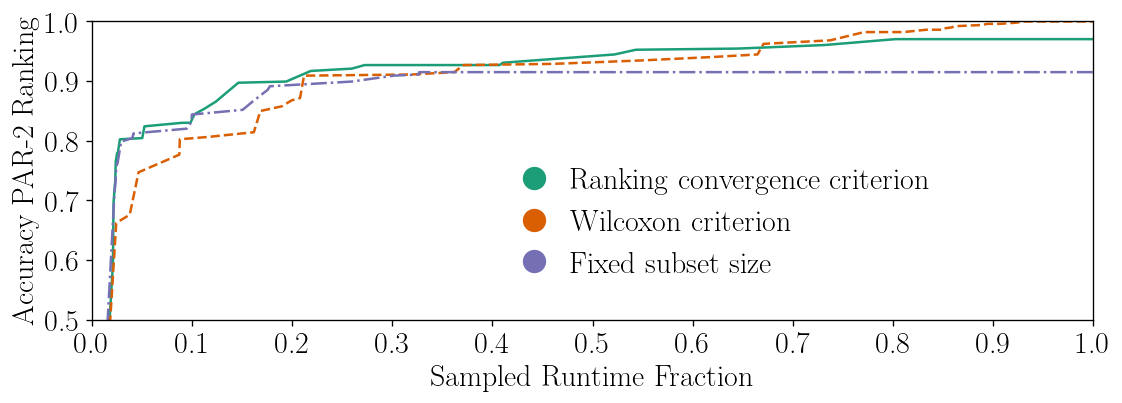

In [6]:
figure, axis = plt.subplots(1, 1, figsize=(10, 4), dpi=120)
figure.tight_layout(pad=4)
plot(axis, True, False, True, False)

legend_elements2 = [Line2D([0], [0], marker='o', color='w', label='Ranking convergence criterion',
                           markerfacecolor=colorpalette[0], markersize=15),
                    Line2D([0], [0], marker='o', color='w', label='Wilcoxon criterion',
                           markerfacecolor=colorpalette[1], markersize=15),
                    Line2D([0], [0], marker='o', color='w', label='Fixed subset size',
                           markerfacecolor=colorpalette[2], markersize=15)]
axis.legend(handles=legend_elements2, loc=(0.6, 0.1),
               fontsize=fs, bbox_to_anchor=(1.0, 0.0, -1.0, 1.0), frameon=False, handletextpad=0.2)

plt.savefig("plots/anni_train_color_stopping.pgf")
plt.show()

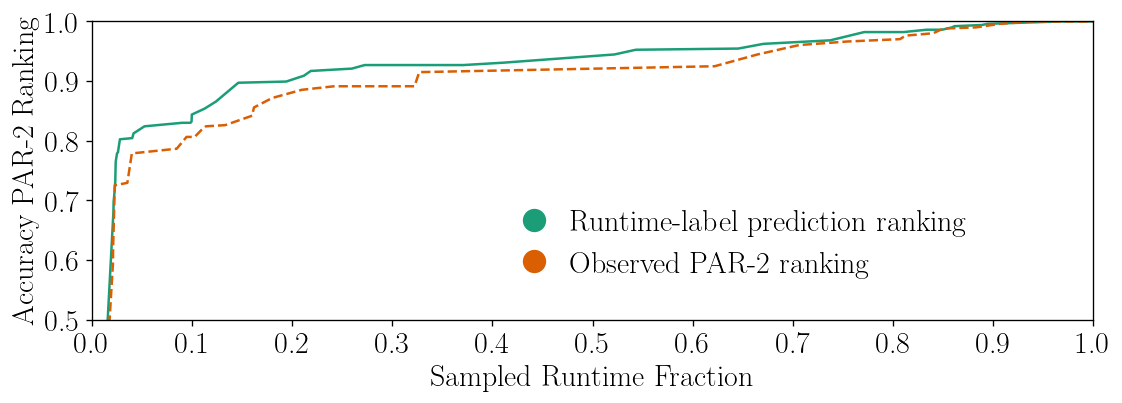

In [7]:
figure, axis = plt.subplots(1, 1, figsize=(10, 4), dpi=120)
figure.tight_layout(pad=4)
plot(axis, True, False, False, True, a=0.7)

legend_elements2 = [Line2D([0], [0], marker='o', color='w', label='Runtime-label prediction ranking',
                           markerfacecolor=colorpalette[0], markersize=15),
                    Line2D([0], [0], marker='o', color='w', label='Observed PAR-2 ranking',
                           markerfacecolor=colorpalette[1], markersize=15)]
axis.legend(handles=legend_elements2, loc=(0.6, 0.1),
               fontsize=fs, bbox_to_anchor=(1.0, 0.0, -1.0, 1.0), frameon=False, handletextpad=0.2)

plt.savefig("plots/anni_train_color_ranking.pgf")
plt.show()

# Complete anni-seq dataset

In [24]:
import pickle
import numpy as np
import pandas as pd

with open("./pickled-data/anni_final_df.pkl", "rb") as file:
    anni_final_df: pd.DataFrame = pickle.load(file).copy()
with open("./pickled-data/base_features_df.pkl", "rb") as file:
    base_features_df: pd.DataFrame = pickle.load(file).copy()

avg_records = []
for i, _ in enumerate(anni_final_df.index):
    h = anni_final_df.index[i]
    avg_records.append((
        h,
        base_features_df.loc[h, "clauses"],
        base_features_df.loc[h, "variables"],
        anni_final_df.mean(axis=1).replace(np.inf, 5000)[h]
    ))
avg_df = pd.DataFrame.from_records(avg_records, columns=["hash", "clauses", "variables", "avg_rt"], index="hash")
 
print(avg_df.shape)
    
avg_df.mean(axis=0)

(5301, 3)


clauses      1.180794e+06
variables    1.694327e+05
avg_rt       2.660946e+03
dtype: float64

In [25]:
avg_df.mean(axis=0)[2] * anni_final_df.shape[1] * anni_final_df.shape[0] / (60 * 60 * 24 * 365)

12.524063056868847

In [1]:
import pickle
import numpy as np
import pandas as pd

with open("./pickled-data/anni_full_df.pkl", "rb") as file:
    anni_full_df: pd.DataFrame = pickle.load(file)
    
#print(ifilter)
par2_ranking = []
for i, x in enumerate(sorted(zip(
    np.mean(anni_full_df.replace([np.inf, np.nan], 2 * 5000), axis=0),
    anni_full_df.columns
))):
    par2_ranking.append((i + 1, x[0], x[1]))
    #print(f"{(i+1):2}  {x[0]:.3f}  {x[1]}")
#print()
    
import pickle
import numpy as np
import pandas as pd
from typing import List, Tuple


def min_log_dist(i: List[float], j: List[float]) -> float:
    fst = np.log1p(i)
    snd = np.log1p(j)
    return np.min(snd) - np.max(fst)


def merge_closest_intervals(
    train_solvers: List[str], runtimes_df: pd.DataFrame, n_intervals=2
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """ Hierarchical merging of the runtimes into clusters.

    Args:
        train_solvers (List[str]): The list of known solvers.
        runtimes_df (pd.DataFrame): The runtimes to cluster.
        n_intervals (int, optional): The number of labels to
        cluster the runtime into. Defaults to 2.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: A tuple of cluster labels
        and the boundaries between the labels.
    """

    merge_runtimes_df = runtimes_df[train_solvers].replace(
        [-np.inf, np.inf, np.nan], 0).astype(dtype=np.int8).copy()
    boundaries = {}

    for idx, (pd_index, instance) in enumerate(list(runtimes_df[train_solvers].iterrows())):
        if np.all(np.isinf(instance)):
            merge_runtimes_df.iloc[idx, :] = n_intervals

            # All solvers have time-out
            decision_boundaries = [
                np.nan,
                np.nan,
            ]
        else:
            actual_n_intervals = min(n_intervals, np.unique(instance).shape[0])
            unique_vals = list(np.sort(np.unique(instance)))
            if unique_vals[-1] == np.inf:
                del unique_vals[-1]
            intervals = [[i] for i in unique_vals]

            # Function to find the smallest distance between neighboring intervals
            def find_smallest_dist_neighbors(intervals):
                min_val = -1
                min_idx = -1
                idx = 0
                for i, j in zip(intervals[:-1], intervals[1:]):
                    val = min_log_dist(i, j)
                    if min_val == -1 or val < min_val:
                        min_val = val
                        min_idx = idx
                    idx += 1
                return min_idx, min_val

            # Repeat merging until desired number of intervals reached
            def merge_recursive(intervals):
                if len(intervals) <= actual_n_intervals:
                    return intervals
                else:
                    min_idx, min_val = find_smallest_dist_neighbors(intervals)
                    intervals[min_idx] += intervals[min_idx + 1]
                    del intervals[min_idx + 1]
                    return merge_recursive(intervals)

            # Compute clustering
            intervals = merge_recursive(intervals)
            curr_cluster_id = 0
            value_cluster_map = {np.inf: n_intervals}
            for interval in intervals:
                for value in interval:
                    value_cluster_map[value] = curr_cluster_id
                curr_cluster_id += 1

            # Compute boundaries of cluster labels
            sorted_labels = sorted(value_cluster_map.items())
            decision_boundaries = []
            for ((val1, int1), (val2, int2)) in zip(sorted_labels[:-1], sorted_labels[1:]):
                if int1 + 1 == int2:
                    # All cluster labels exist, use mean log distance as boundary
                    log_val1 = np.log1p(val1)
                    log_val2 = np.log1p(val2) if not np.isinf(
                        val2) else np.log1p(5000.0)
                    log_center = log_val1 + (log_val2 - log_val1) / 2
                    decision_boundaries.append(np.exp(log_center) - 1)
                elif int1 + 2 == int2:
                    # Only one solver does not time-out, log-divide space for boundaries
                    log_val1 = np.log1p(val1)
                    log_val2 = np.log1p(val2) if not np.isinf(
                        val2) else np.log1p(5000.0)
                    log_center = log_val1 + (log_val2 - log_val1) / 3
                    decision_boundaries.append(np.exp(log_center) - 1)
                    log_center = log_val1 + 2 * (log_val2 - log_val1) / 3
                    decision_boundaries.append(np.exp(log_center) - 1)

            # Output clusters for row
            merge_runtimes_df.iloc[idx, :] = instance.apply(
                lambda i: value_cluster_map[i])

        # Set decision boundary range
        boundaries[pd_index] = decision_boundaries

    return merge_runtimes_df, pd.DataFrame.from_dict(boundaries).transpose()


label_ranking = []
cluster_labels, b = merge_closest_intervals(anni_full_df.columns, anni_full_df)

#print(ifilter)
for i, x in enumerate(sorted(zip(
    np.mean(
        np.where(cluster_labels == 2, 4, cluster_labels),
        axis=0
    ),
    anni_full_df.columns
))):
    label_ranking.append((i + 1, x[0], x[1]))
    #print(f"{(i+1):2}  {x[0]:.3f}  {x[1]}")
#print()
#print(np.count_nonzero(
#    np.array([x[2] for x in label_ranking[ifilter]])
#    == np.array([x[2] for x in par2_ranking[ifilter]])) / 16)
    
def ranking_comp():
    ranking = []
    for (i, par2, solver1), (_, label_rank, solver2) in zip(par2_ranking, label_ranking):
        ranking.append((i, par2, float(f"{par2:.2f}"), solver1, label_rank, float(f"{label_rank:.2f}"), solver2))

    return pd.DataFrame.from_records(
        ranking, columns=[
            "rank", "par2", "par2_trunc", "par2_solver",
            "label_rank", "label_rank_trunc", "label_rank_solver"], index="rank")

ranking_anni = ranking_comp()
ranking_anni

,par2,par2_trunc,par2_solver,label_rank,label_rank_trunc,label_rank_solver
rank,,,,,,
1,2806.399950,2806.40,Kissat_MAB_ESA,1.171615,1.17,Kissat_MAB_ESA
2,2810.958876,2810.96,kissat-sc2022-bulky,1.182820,1.18,kissat-sc2022-bulky
3,2830.143350,2830.14,ekissat-mab-gb-db,1.184687,1.18,ekissat-mab-gb-db
4,2833.080702,2833.08,Kissat_MAB_UCB,1.185808,1.19,kissat_inc
5,2833.396989,2833.40,kissat_inc,1.186368,1.19,Kissat_MAB_UCB
6,2841.734300,2841.73,ekissat-mab-db-v1,1.191597,1.19,ekissat-mab-db-v1
7,2842.665502,2842.67,Kissat_MAB_MOSS,1.191970,1.19,Kissat_MAB_MOSS
8,2857.219430,2857.22,Kissat_MAB-HyWalk,1.194771,1.19,Kissat_MAB-HyWalk
9,2866.960391,2866.96,kissat-sc2022-light,1.199627,1.20,kissat-sc2022-light


In [11]:
ranking_anni.loc[:, ["par2", "par2_solver", "label_rank", "label_rank_solver"]]

,par2,par2_solver,label_rank,label_rank_solver
rank,,,,
1,2806.399950,Kissat_MAB_ESA,1.171615,Kissat_MAB_ESA
2,2810.958876,kissat-sc2022-bulky,1.182820,kissat-sc2022-bulky
3,2830.143350,ekissat-mab-gb-db,1.184687,ekissat-mab-gb-db
4,2833.080702,Kissat_MAB_UCB,1.185808,kissat_inc
5,2833.396989,kissat_inc,1.186368,Kissat_MAB_UCB
6,2841.734300,ekissat-mab-db-v1,1.191597,ekissat-mab-db-v1
7,2842.665502,Kissat_MAB_MOSS,1.191970,Kissat_MAB_MOSS
8,2857.219430,Kissat_MAB-HyWalk,1.194771,Kissat_MAB-HyWalk
9,2866.960391,kissat-sc2022-light,1.199627,kissat-sc2022-light


In [2]:
# Amount correct binary ranking decisions
amounts_anni = []
diffs = []
for i, par2_solver in enumerate(ranking_anni["par2_solver"]):
    correct_r = i
    actual_r = np.where(ranking_anni["label_rank_solver"] == par2_solver)[0][0]
    diffs.append(np.abs(ranking_anni.loc[actual_r + 1, "label_rank"] - ranking_anni.loc[correct_r + 1, "label_rank"]))
    amounts_anni.append(np.abs(correct_r - actual_r) / ranking_anni.shape[0])
print("Amount correct binary ranking decisions")
print(f"Anniversary Track: {1 - np.mean(amounts_anni):.4f} ({np.std(amounts_anni):.4f}) (min: {1 - np.max(amounts_anni):.4f}, max: {1 - np.min(amounts_anni):.4f})")
print(f"Max. difference in label ranking between wrong rankings: {np.max(diffs):.2f}")

Amount correct binary ranking decisions
Anniversary Track: 0.9745 (0.0368) (min: 0.8571, max: 1.0000)
Max. difference in label ranking between wrong rankings: 0.11


In [3]:
# Spearman-Correlation
from scipy.stats import spearmanr

reordered_label_ranks = []
for i, par2_solver in enumerate(ranking_anni["par2_solver"]):
    correct_r = i
    actual_r = np.where(ranking_anni["label_rank_solver"] == par2_solver)[0][0]
    reordered_label_ranks.append(ranking_anni.loc[actual_r + 1, "label_rank"])
    
spearmanr(ranking_anni["par2"], reordered_label_ranks)[0]

0.9879584017515052

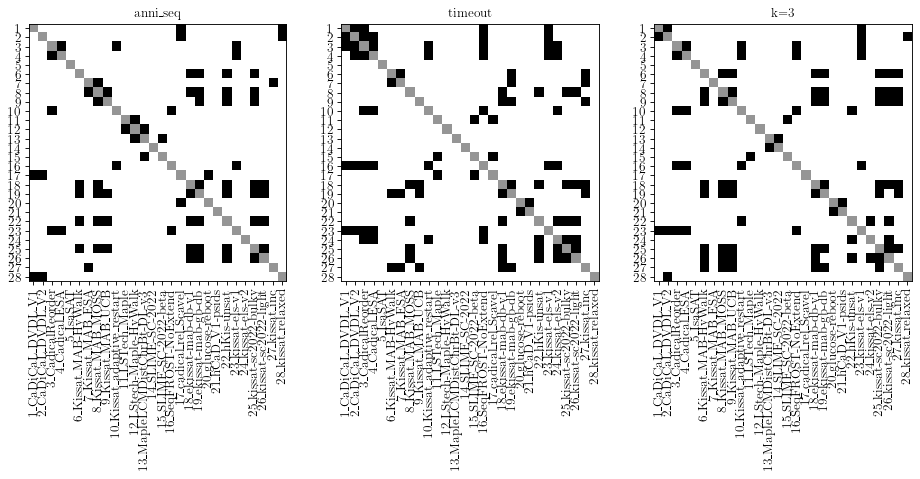

White = Significant Difference

Amount of significant pairs:
anni_seq: 680/756 = 0.8995
timeout: 658/756 = 0.8704
k=3: 664/756 = 0.8783


In [4]:
from itertools import product
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

fs = 12

plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)

def plot_significance(clustering, title=None, axis=None, alpha=0.05, fs=12, bottom=True, first=False):
    solvers = list(clustering.columns)
    significance_matrix = np.zeros((len(solvers), len(solvers)), dtype=np.int8)
    sig, non_sig = 0, 0
    
    for (i, sa), (j, sb) in product(enumerate(solvers), enumerate(solvers)):
        if i == j:
            significance_matrix[i, j] = 0
        elif wilcoxon(
            clustering[sa].to_numpy(),
            clustering[sb].to_numpy()
        ).pvalue < alpha:
            sig += 1
            significance_matrix[i, j] = -1
        else:
            non_sig += 1
            significance_matrix[i, j] = 1
    
    if axis is not None:
        axis.imshow(significance_matrix, cmap="Greys")
        if bottom:
            axis.set_title(title, fontsize=fs)
            axis.set_xticks(ticks=range(len(solvers)), labels=[
                f"{i+1}_{s}"
                for i, s in enumerate(solvers)
            ], rotation=90)
            axis.set_yticks(ticks=range(len(solvers)), labels=range(1, len(solvers)+1))
        elif first:
            axis.set_yticks(ticks=range(len(solvers)), labels=[
                f"{i+1}_{s}"
                for i, s in enumerate(solvers)
            ])
            axis.set_xticks(ticks=range(len(solvers)), labels=range(1, len(solvers)+1))
        else:
            axis.set_xticks(ticks=range(len(solvers)), labels=range(1, len(solvers)+1))
            axis.set_yticks(ticks=range(len(solvers)), labels=range(1, len(solvers)+1))
            
    return sig, non_sig, significance_matrix

figure, axis = plt.subplots(1, 3, figsize=(12, 6), dpi=80)
figure.tight_layout(pad=2)
sig, non_sig = 0, 0
s1, n1, _ = plot_significance(anni_full_df.replace(np.inf, 10000.0), "anni_seq", axis[0])
s2, n2, _ = plot_significance(cluster_labels.where(cluster_labels == 2, 0).where(cluster_labels == 0, 1), "timeout", axis[1])
s3, n3, _ = plot_significance(cluster_labels, "k=3", axis[2]) 
plt.show()

print("White = Significant Difference")
print()
print("Amount of significant pairs:")
print(f"anni_seq: {s1}/{s1+n1} = {s1/(s1+n1):.4f}")
print(f"timeout: {s2}/{s2+n2} = {s2/(s2+n2):.4f}")
print(f"k=3: {s3}/{s3+n3} = {s3/(s3+n3):.4f}")

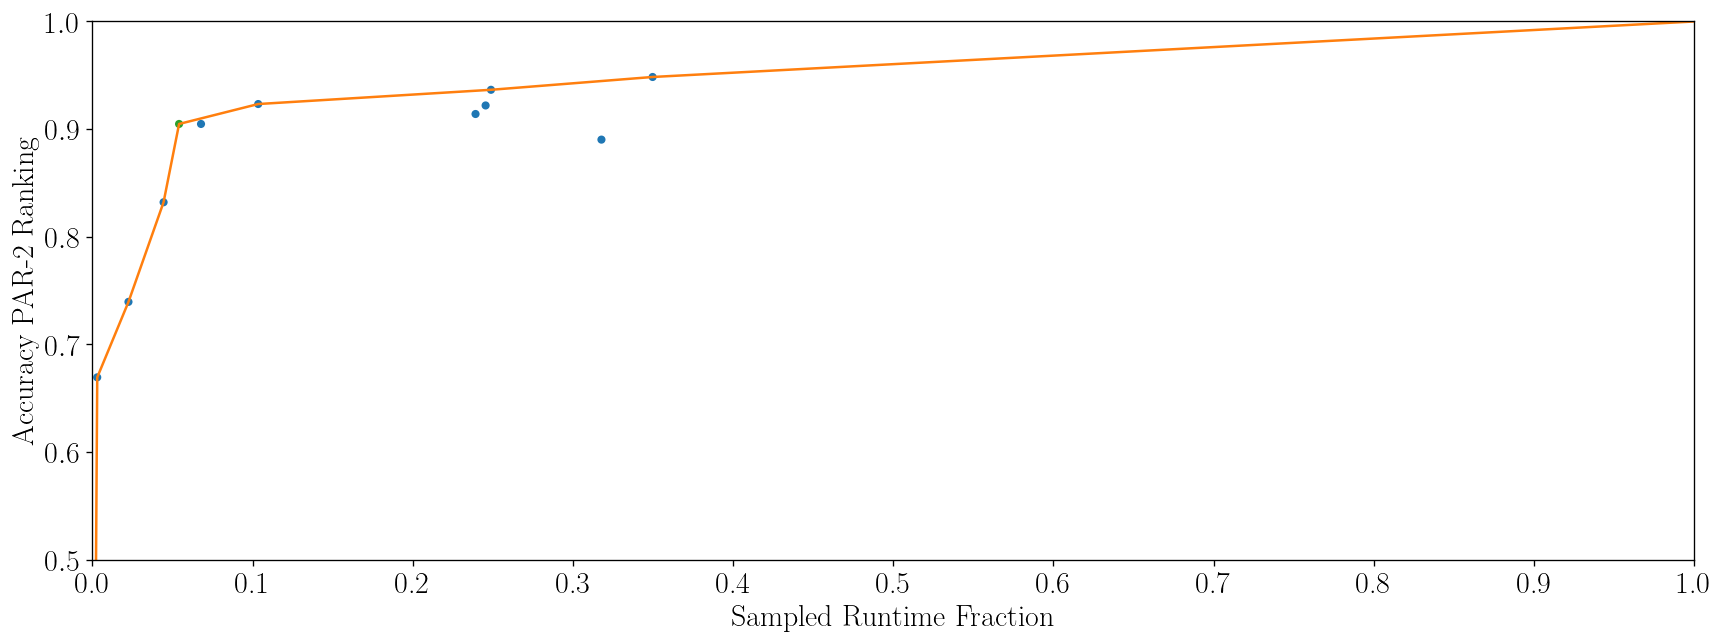

In [4]:
import pickle
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter("ignore")

fs = 18
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)


def plot_final(axis, rel=True, color_selection=False, color_stopping=False, color_ranking=False, a=1.0):
    allp = 5301
    
    # Read data
    datasets = {}
    for f in glob("./pickled-data/end_to_end/custom_anni_final_*.csv"):
        name = f.split("/")[-1]
        datasets[name] = pd.read_csv(f, index_col="solver")
    
    c = []
    blue = 0
    green = 0
    red = 0
    for n in datasets.keys():
        if color_selection:
            if "unc_0." in n:
                c.append("tab:blue")
                blue += 1
            elif "ig_0." in n:
                c.append("tab:green")
                green += 1
            else:
                c.append("tab:red")
                red += 1
        elif color_stopping:
            if "rnk_conv_0." in n:
                c.append("tab:blue")
                blue += 1
            elif "wil_0." in n:
                c.append("tab:green")
                green += 1
            else:
                c.append("tab:red")
                red += 1
        elif color_ranking:
            if "lbl_pred_" in n:
                c.append("tab:blue")
                blue += 1
            elif "_par2_obs" in n:
                c.append("tab:green")
                green += 1
            else:
                c.append("tab:red")
                red += 1
        else:
            c.append("tab:blue")
            blue += 1
    
    max_color = max(blue, green, red)
    blue_alpha = 0.5 + (1 - blue / max_color) / 2
    green_alpha = 0.5 + (1 - green / max_color) / 2
    red_alpha = 0.5 + (1 - red / max_color) / 2
    
    xs_abs = []
    xs_rel = []
    par2_ys = []
    label_ys = []
    spearman_ys = []
    #unc_ig = []
    #ranking_a = []
    for n, df in datasets.items():
        xs_abs.append(np.mean(df.loc[:, "num_instances"]) / allp)
        xs_rel.append(np.mean(df.loc[:, "amount_runtime"]))
        par2_ys.append(np.mean(df.loc[:, "par2_ranking_acc"]))
        label_ys.append(np.mean(df.loc[:, "label_ranking_acc"]))
        spearman_ys.append(np.mean(df.loc[:, "spearman"]))
        #unc_ig.append("tab:blue" if "unc_0" in n else ("tab:green" if "ig_0" in n else "tab:red"))
        #ranking_a.append("o" if "rnk_conv_0" in n else "x")

    perm = np.random.permutation(len(xs_abs))
    c = np.array(c)[perm].copy()
    xs_abs = np.array(xs_abs)[perm].copy()
    xs_rel = np.array(xs_rel)[perm].copy()
    par2_ys = np.array(par2_ys)[perm].copy()
    label_ys = np.array(label_ys)[perm].copy()
    spearman_ys = np.array(spearman_ys)[perm].copy()
    #unc_ig = np.array(unc_ig) 
    #ranking_a = np.array(ranking_a) 
    
    pareto_y_values = {}
    if rel:
        for x, y in zip(xs_rel, par2_ys):
            k = f"{x:.4f}"
            if k not in pareto_y_values:
                pareto_y_values[k] = []
            pareto_y_values[k].append(y)
    else:
        for x, y in zip(xs_abs, par2_ys):
            k = f"{x:.4f}"
            if k not in pareto_y_values:
                pareto_y_values[k] = []
            pareto_y_values[k].append(y)
        
    pareto_x = [0.0]
    pareto_y = [0.0]
    last_max = 0.0
    for k, v in sorted(pareto_y_values.items()):
        m = np.max(v)
        if m > last_max:
            last_max = m
            pareto_x.append(float(k))
            pareto_y.append(last_max)
    pareto_x.append(1.0)
    pareto_y.append(1.0)

    #for m in ["o", "x"]:
    if rel:
        axis.scatter(
            xs_rel, par2_ys, s=15,
            c=c, marker="o",
            alpha=a,
        )
    else:
        axis.scatter(
            xs_abs, par2_ys, s=15,
            c=c, marker="o",
            alpha=a,
        )
    axis.plot(pareto_x, pareto_y, "-", color="tab:orange", alpha=1.0)
    
    axis.set_xlim(0.0, 1.0)
    axis.set_ylim(0.5, 1.0)
    axis.set_xticks(np.arange(0.0, 1.1, 0.1), [f"{x:.1f}" for x in np.arange(0.0, 1.1, 0.1)])
    
    #axis.set_title("Combined", fontsize=(fs+2))
    if rel:
        axis.set_xlabel("Sampled Runtime Fraction", fontsize=fs)
    else:
        axis.set_xlabel("Number of Instances", fontsize=fs)
    axis.set_ylabel("Accuracy PAR-2 Ranking", fontsize=fs)

    
figure, axis = plt.subplots(1, 1, figsize=(15, 6), dpi=120)
figure.tight_layout(pad=4)
plot_final(axis, True, True, False, False)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#legend_elements1 = [Line2D([0], [0], marker='o', color='white', label='Ranking Convergence',
#                           markerfacecolor='black', markersize=10),
#                   Line2D([0], [0], marker='x', color='black', lw=0, label='Wilcoxon Criterion',
#                          markerfacecolor='black', markersize=10)]
#fst_legend = axis[2].legend(handles=legend_elements1, loc=(0.56, 0.25),
#                            fontsize=fs, bbox_to_anchor=(1.0, 0.0, -1.0, 1.0))
#axis[2].add_artist(fst_legend)

#legend_elements2 = [Line2D([0], [0], marker='o', color='w', label='Model-based uncertainty sampling',
#                           markerfacecolor='tab:blue', markersize=15),
#                    Line2D([0], [0], marker='o', color='w', label='Model-based information-gain sampling',
#                           markerfacecolor='tab:green', markersize=15),
#                    Line2D([0], [0], marker='o', color='w', label='Random sampling',
#                           markerfacecolor='tab:red', markersize=15)]
#axis.legend(handles=legend_elements2, loc=(0.4, 0.1),
#               fontsize=fs, bbox_to_anchor=(1.0, 0.0, -1.0, 1.0))

#plt.savefig("plots/anni_train_color_selection.pgf")
plt.show()

# o - Ranking convergence, x - Wilcoxon stopping criterion
# blue - uncertainty sampling, green - model ig

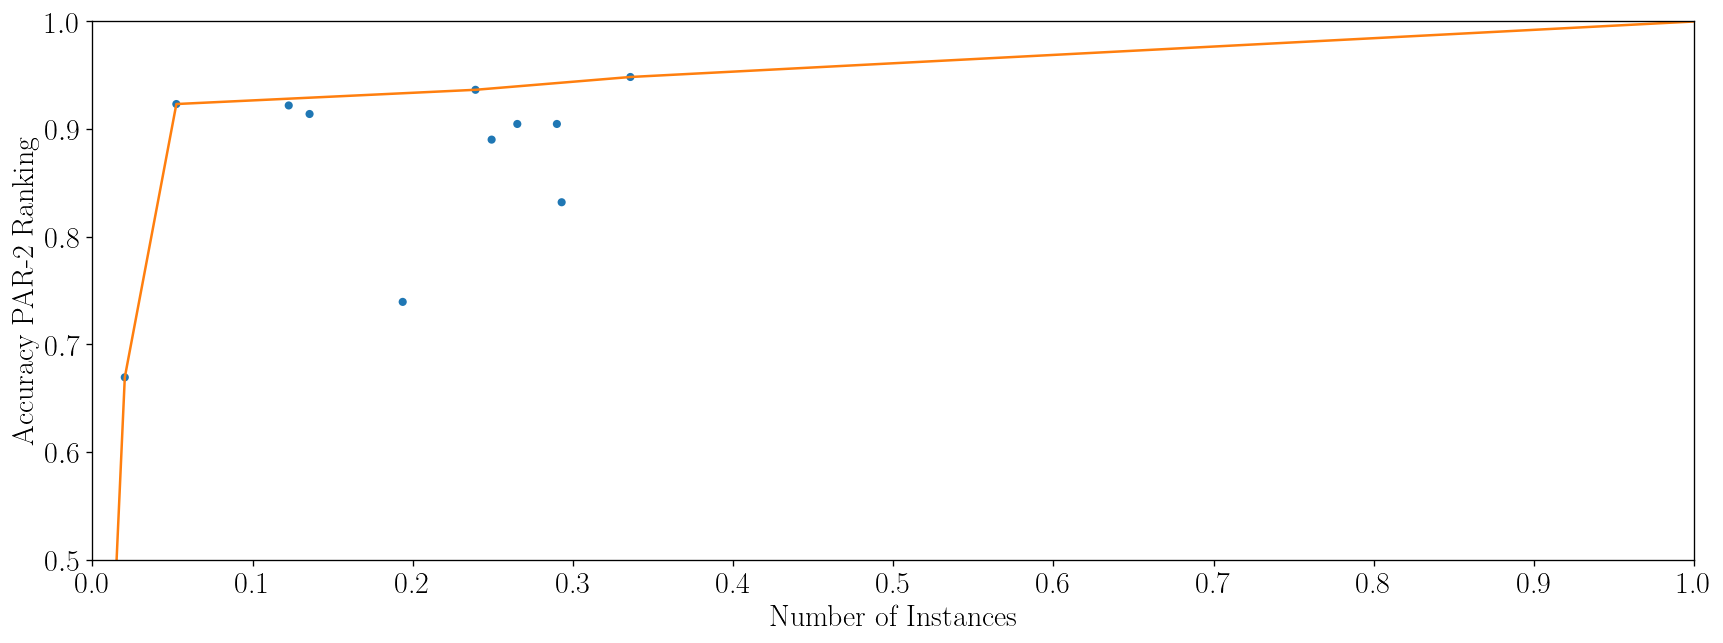

In [5]:
figure, axis = plt.subplots(1, 1, figsize=(15, 6), dpi=120)
figure.tight_layout(pad=4)
plot_final(axis, False, False, False, False)
plt.show()

In [2]:
from glob import glob

allp = 5301
    
# Read data
datasets = {}
for f in glob("./pickled-data/end_to_end/custom_anni_final_*.csv"):
    name = f.split("/")[-1]
    datasets[name] = pd.read_csv(f, index_col="solver")

records = []
for n, df in datasets.items():
    xs_abs = np.mean(df.loc[:, "num_instances"]) / allp
    xs_rel = np.mean(df.loc[:, "amount_runtime"])
    par2_ys = np.mean(df.loc[:, "par2_ranking_acc"])
    label_ys = np.mean(df.loc[:, "label_ranking_acc"])
    spearman_ys = np.mean(df.loc[:, "spearman"])
    records.append((n[18:-4], xs_abs, xs_rel, par2_ys, label_ys, spearman_ys))
    
t = pd.DataFrame.from_records(records, columns=[
    "name", "fraction_instances", "fraction_runtime", "par2_ranking_acc", "label_ranking_acc", "spearman"
]).sort_values("fraction_runtime").set_index("name", drop=True)
t["score"] = 0.85 * t["par2_ranking_acc"] + 0.15 * (1 - t["fraction_runtime"])
t.sort_values("score")

,fraction_instances,fraction_runtime,par2_ranking_acc,label_ranking_acc,spearman,score
name,,,,,,
unc_0.00_True_rnk_conv_0.01_0.02_par2_obs,0.020185,0.002976,0.669312,0.665344,0.954664,0.718469
unc_0.00_True_rnk_conv_0.02_0.10_lbl_pred_True_0.00_20_0.05,0.193703,0.022489,0.739418,0.751323,0.961703,0.775132
unc_0.00_True_rnk_conv_0.02_0.08_lbl_pred_True_0.00_10_0.01,0.292943,0.044419,0.832011,0.833333,0.972981,0.850546
unc_0.00_False_wil_0.08_0.05_0.10_par2_obs,0.249225,0.317788,0.890212,0.878307,0.973740,0.859012
unc_0.05_False_rnk_conv_0.02_0.10_lbl_pred_True_0.00_10_0.05,0.135554,0.239175,0.914021,0.925926,0.982347,0.891042
unc_0.00_False_rnk_conv_0.01_0.12_lbl_pred_True_0.00_30_0.05,0.122551,0.245469,0.921958,0.928571,0.983031,0.896844
unc_0.10_False_wil_0.10_0.05_0.10_lbl_pred_True_0.00_40_0.10,0.335860,0.349739,0.948413,0.928571,0.984170,0.903690
unc_0.15_False_wil_0.08_0.05_0.10_par2_obs,0.239146,0.248829,0.936508,0.921958,0.981823,0.908707
unc_0.05_True_rnk_conv_0.01_0.12_lbl_pred_True_0.00_10_0.01,0.289972,0.067788,0.904762,0.916667,0.981643,0.908879


# Instance importance

In [62]:
import pickle
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter("ignore")

# Read data
datasets = []
for f in glob("./pickled-data/end_to_end/custom_anni_final_*.pkl"):
    csv_f = f[:-17] + ".csv"
    with open(csv_f, "rb") as fs:
        df = pd.read_csv(fs, index_col="solver")
        #if np.mean(df.loc[:, "num_instances"]) / allp > 0.10:
        #    continue
    with open(f, "rb") as fs:
        y_sampled = pickle.load(fs).copy()
        datasets.append(y_sampled)
sampled_instances = np.vstack(datasets).transpose().copy()
sampled_instances.shape  # 5301 x (28 solver * 11 configs)

(5301, 308)

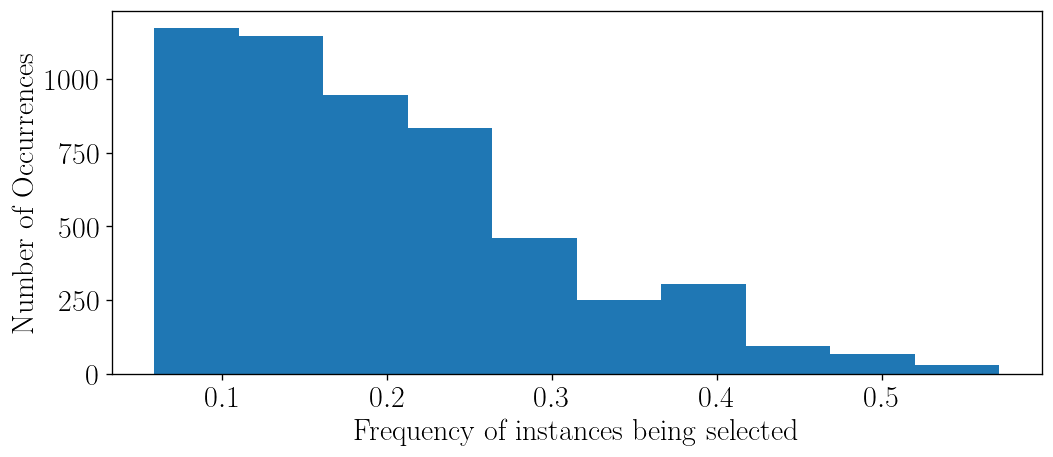

In [63]:
sample_freq = np.sum(sampled_instances, axis=1) / sampled_instances.shape[1]

fs = 18
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)

figure, axis = plt.subplots(1, 1, figsize=(10, 4), dpi=120)
axis.hist(sample_freq, bins=10)
axis.set_xlabel("Frequency of instances being selected", fontsize=fs)
axis.set_ylabel("Number of Occurrences", fontsize=fs)
plt.show()

In [64]:
with open("./pickled-data/anni_final_df.pkl", "rb") as file:
    anni_final_df: pd.DataFrame = pickle.load(file).copy()
with open("./pickled-data/meta_df.pkl", "rb") as file:
    meta_df: pd.DataFrame = pickle.load(file).copy()

freq_records = []
for i, freq in enumerate(sample_freq):
    h = anni_final_df.index[i]
    freq_records.append((
        h,
        freq,
        meta_df.loc[h, "family"],
    ))
freq_df = pd.DataFrame.from_records(freq_records, columns=["hash", "freq", "family"], index="hash")

In [65]:
print(f"Average benchmark set size: {freq_df['freq'].sum():.4f} / {freq_df.shape[0]} = {freq_df['freq'].sum() / freq_df.shape[0]:.4f}")

Average benchmark set size: 1058.6461 / 5301 = 0.1997


In [66]:
# Most frequent instances
freq_df.sort_values("freq", ascending=False).head(20)

,freq,family
hash,,
90fd3ab118c483a7d99707384c6c6c0a,0.571429,random
23a92c04ee9248308a18d6a44e5d15f0,0.558442,battleship
5aacd7fd4850b3712de14275906f1e29,0.558442,mosoi-289
d08c5fac67a7490e7f976dc07a891148,0.551948,pigeon-hole
3e04d7740237fb695f4b86ab0cf25a6d,0.551948,mosoi-289
57f34c7f226121206e07b7219879838d,0.542208,planning
1169b7c01112d97a6835d259052284ba,0.538961,planning
d35caf50ac810de6ae2693995894a629,0.538961,battleship
c3cc6d7dc2f972fa2d8b4830f230aacf,0.535714,genurq


In [67]:
# Selection frequency by family
freq_agg_df = freq_df.groupby("family").sum()
freq_count_df = freq_df.groupby("family").count()
freq_agg_df["count"] = freq_count_df["freq"]
freq_agg_df["importance"] = freq_agg_df["freq"] / freq_agg_df["count"]
freq_agg_df.sort_values("freq", ascending=False).head(20)

# Most frequent families

,freq,count,importance
family,,,
planning,88.035714,333,0.264372
hardware-verification,67.792208,344,0.197070
quasigroup-completion,60.834416,210,0.289688
cryptography,50.987013,311,0.163945
bitvector,39.681818,214,0.185429
miter,38.840909,199,0.195180
subgraph-isomorphism,34.633117,175,0.197904
graph-based,30.707792,134,0.229163
pigeon-hole,27.610390,151,0.182850


In [68]:
# Most "important" families
freq_agg_df.sort_values("importance", ascending=False).head(20)

,freq,count,importance
family,,,
genurq,4.620130,12,0.385011
fpga-routing,26.363636,73,0.361146
dining-philosophers,9.071429,27,0.335979
product-configuration,1.655844,5,0.331169
fdmus,15.500000,50,0.310000
bounded-model-checking,4.321429,14,0.308673
testpattern-generation,4.272727,14,0.305195
battleship,9.431818,32,0.294744
finite-state-machines,2.633117,9,0.292569


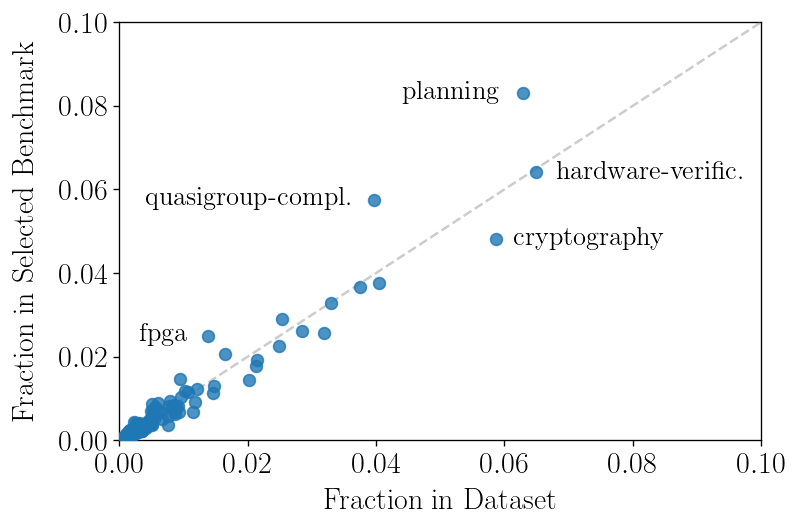

In [157]:
freq_agg_df["freq_rel"] = freq_agg_df["freq"] / freq_agg_df["freq"].sum()
freq_agg_df["dataset_rel"] = freq_agg_df["count"] / freq_agg_df["count"].sum()
freq_agg_df["importance_rel"] = freq_agg_df["freq_rel"] / freq_agg_df["dataset_rel"]

fs = 18
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)

figure, axis = plt.subplots(1, 1, figsize=(7, 5), dpi=120)
figure.tight_layout(pad=4)

cmap = sns.color_palette("coolwarm", as_cmap=True)

axis.plot(np.linspace(0.0, 10.0, 10), np.linspace(0.0, 10.0, 10), "--", color="grey", alpha=0.4, zorder=5)
points = axis.scatter(
    freq_agg_df["dataset_rel"], freq_agg_df["freq_rel"],
    #c=freq_agg_df["importance_rel"], cmap=cmap,
    alpha=0.8, zorder=10, s=50)

#cbar = figure.colorbar(points)#, ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
#cbar.ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0])
cbar.ax.set_ylabel("$\delta$", fontsize=fs, rotation=0)

axis.set_xlim(0.0, 0.1)
axis.set_ylim(0.0, 0.1)

axis.set_xlabel("Fraction in Dataset", fontsize=fs, labelpad=6)
axis.set_ylabel("Fraction in Selected Benchmark", fontsize=fs, labelpad=12)
#axis.set_xticks([0.0,0.1,0.2,0.3],[0.0,0.1,0.2,0.3])
#axis.set_yticks([0.0,0.1,0.2,0.3],[0.0,0.1,0.2,0.3])

plt.text(0.044, 0.0818, "planning", fontsize=(fs-2))
plt.text(0.068, 0.0625, "hardware-verific.", fontsize=(fs-2))
plt.text(0.004, 0.05625, "quasigroup-compl.", fontsize=(fs-2))
plt.text(0.0614, 0.04675, "cryptography", fontsize=(fs-2))
plt.text(0.003, 0.0239, "fpga", fontsize=(fs-2))

plt.savefig("plots/anni_final_families.pgf")
plt.show()

In [145]:
freq_agg_df[(freq_agg_df["freq_rel"] > 0.02) & (freq_agg_df["dataset_rel"] < 0.02)]

,freq,count,importance,freq_rel,dataset_rel,importance_rel
family,,,,,,
fpga-routing,26.363636,73,0.361146,0.024903,0.013771,1.808379
graph-coloring,21.792208,87,0.250485,0.020585,0.016412,1.254264


In [96]:
freq_agg_df["importance_rel"] = freq_agg_df["freq_rel"] / freq_agg_df["dataset_rel"]
freq_agg_df.sort_values("importance_rel", ascending=True).head(20)

,freq,count,importance,freq_rel,dataset_rel,importance_rel
family,,,,,,
random-hiddenmodel,0.288961,3,0.096320,0.000273,0.000566,0.482309
popularity-similarity,3.909091,40,0.097727,0.003693,0.007546,0.489354
equivalence-chain,0.993506,10,0.099351,0.000938,0.001886,0.497482
long-learned-clauses,0.613636,6,0.102273,0.000580,0.001132,0.512114
lam-discrete-geometry,0.652597,6,0.108766,0.000616,0.001132,0.544629
tournament,1.123377,10,0.112338,0.001061,0.001886,0.562513
rubikcube,1.051948,9,0.116883,0.000994,0.001698,0.585273
graph-isomorphism,7.240260,61,0.118693,0.006839,0.011507,0.594335
perfect-matching,1.074675,9,0.119408,0.001015,0.001698,0.597918
